<a href="https://www.kaggle.com/code/tarikemre/pisa-scores-analysis?scriptVersionId=157445594" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pisa-performance-scores-by-country/OECD PISA data.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("/kaggle/input/pisa-performance-scores-by-country/OECD PISA data.csv")

## Some SQL opreations & seperating

In [4]:
pisaMath = df[df["INDICATOR"] == "PISAMATH"][["LOCATION","Value"]]
pisaRead = df[df["INDICATOR"] == "PISAREAD"][["LOCATION","Value"]]
pisaScience = df[df["INDICATOR"] == "PISASCIENCE"][["LOCATION", "Value"]]

In [5]:
uniLoc = df[df["INDICATOR"] == "PISAMATH"]["LOCATION"].unique() #unique locations series
meansMath = []
meansRead = []
meansScience = []

## Which Location has how many data

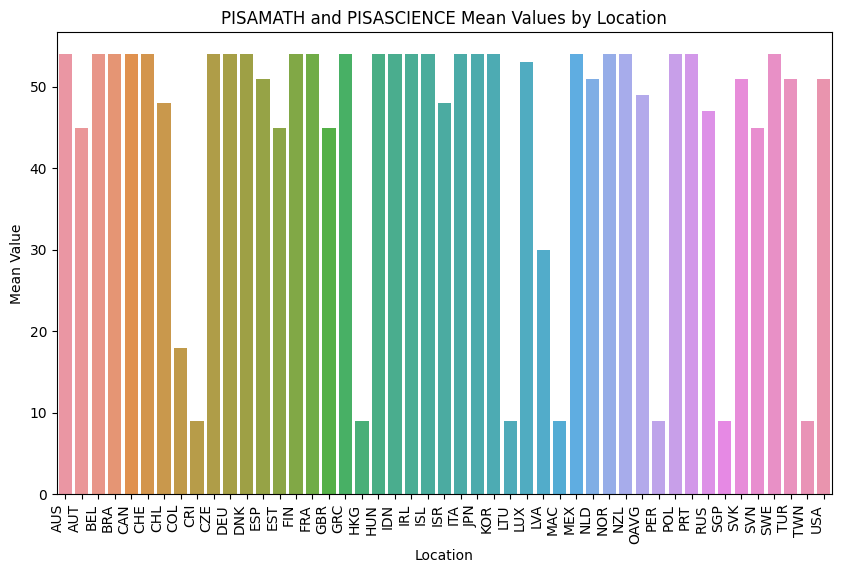

In [6]:
df_grouped = df.groupby('LOCATION')['Value'].count().reset_index()

# Görselleştirme (bar plot)
plt.figure(figsize=(10, 6))
sns.barplot(x='LOCATION', y='Value', data=df_grouped)
plt.title('PISAMATH and PISASCIENCE Mean Values by Location')
plt.xlabel('Location')
plt.ylabel('Mean Value')
plt.xticks(rotation=90, ha='right')
plt.show()

## Get mean value for each indicators by location

In [7]:
for i in uniLoc:
    mean = pisaMath[pisaMath["LOCATION"] == i]['Value'].mean()
    meansMath.append(mean)
    mean = pisaRead[pisaRead["LOCATION"] == i]["Value"].mean()
    meansRead.append(mean)
    mean = pisaScience[pisaScience["LOCATION"] == i]["Value"].mean()
    meansScience.append(mean)    

## Create New DataFrames for Each Indıcators

In [8]:

mathDf = pd.DataFrame(columns=['LOCATION', 'INDICATOR', 'Value'])


mathDf['LOCATION'] = uniLoc
mathDf['INDICATOR'] = "PISAMATH"
mathDf['Value'] = meansMath

readDf = pd.DataFrame(columns=['LOCATION', 'INDICATOR', 'Value'])


readDf['LOCATION'] = uniLoc
readDf['INDICATOR'] = "PISAREAD"
readDf['Value'] = meansRead

sciDf = pd.DataFrame(columns=['LOCATION', 'INDICATOR', 'Value'])


sciDf['LOCATION'] = uniLoc
sciDf['INDICATOR'] = "PISACIENCE"
sciDf['Value'] = meansScience




## part 1 : MEAN VALUES IN ALL TIMES

## 1.1 PISASCIENCE

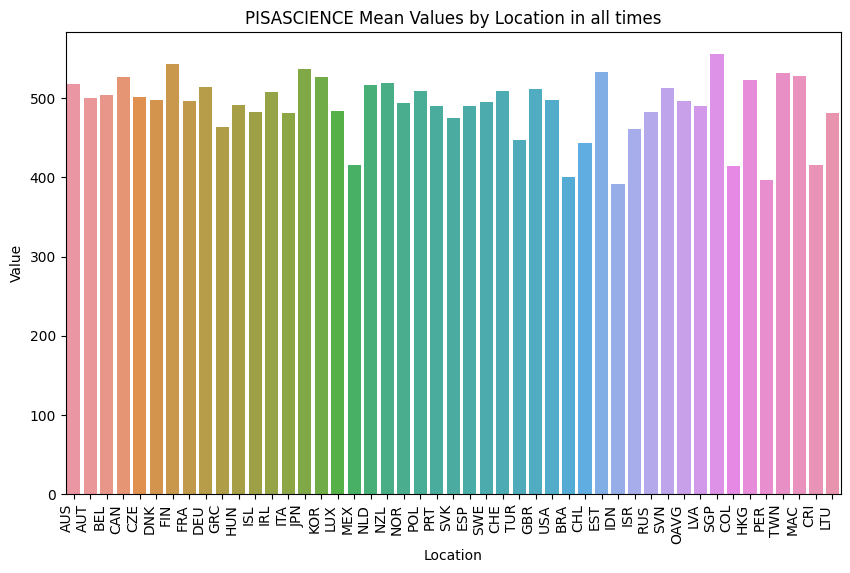

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x='LOCATION', y='Value', data=sciDf)
plt.title('PISASCIENCE Mean Values by Location in all times')
plt.xlabel('Location')
plt.ylabel('Value')
plt.xticks(rotation=90, ha='right')
plt.show()

## 1.2 PISAMATH

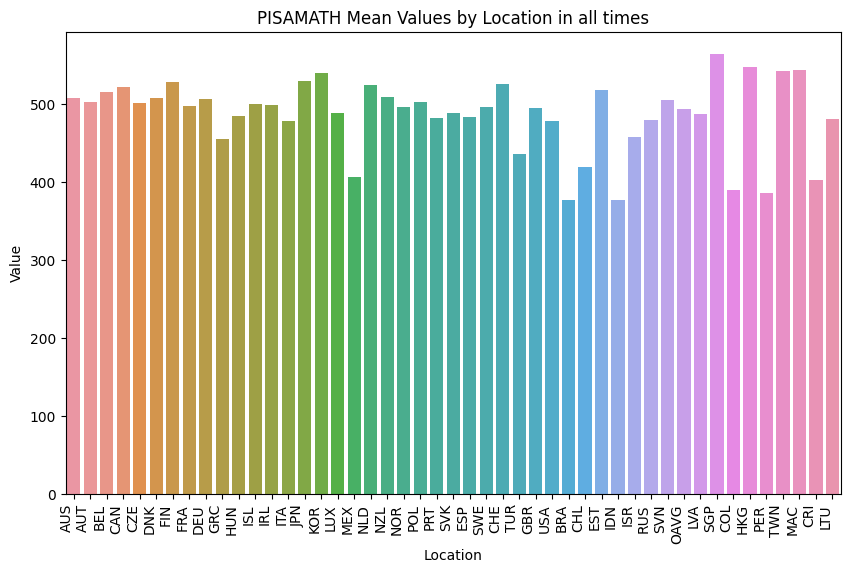

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x='LOCATION', y='Value', data=mathDf)
plt.title('PISAMATH Mean Values by Location in all times')
plt.xlabel('Location')
plt.ylabel('Value')
plt.xticks(rotation=90, ha='right')
plt.show()

## 1.2 PISAREAD

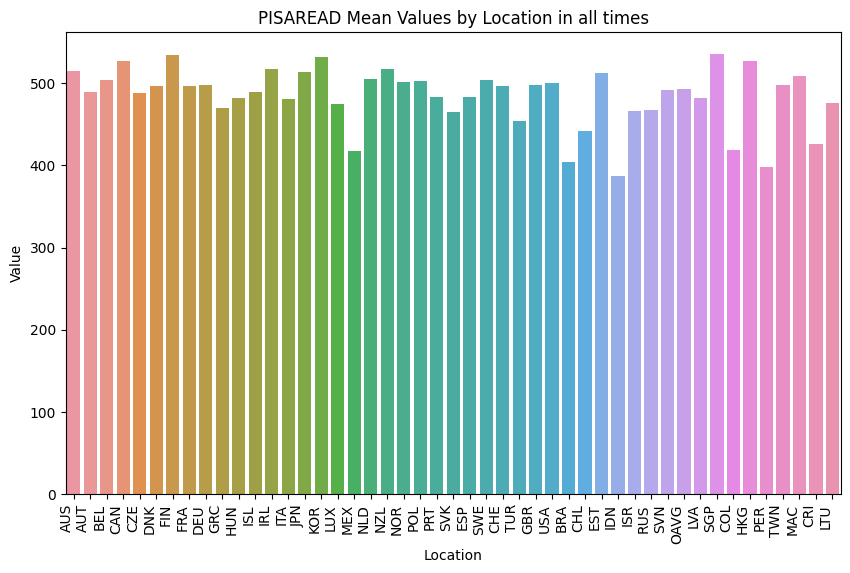

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x='LOCATION', y='Value', data=readDf)
plt.title('PISAREAD Mean Values by Location in all times')
plt.xlabel('Location')
plt.ylabel('Value')
plt.xticks(rotation=90, ha='right')
plt.show()

## part 2 : Mean values for each indicators by Subject

In [12]:
pisaMathSub = df.loc[df["INDICATOR"] == "PISAMATH"][["SUBJECT", "Value"]]
pisaSciSub = df.loc[df["INDICATOR"] == "PISASCIENCE"][["SUBJECT","Value"]]
pisaReadSub = df.loc[df["INDICATOR"] == "PISAREAD"][["SUBJECT" , "Value"]]

In [13]:
mathBoyMean = pisaMathSub.loc[pisaMathSub["SUBJECT"] == "BOY"]["Value"].mean()
mathGirlMean = pisaMathSub.loc[pisaMathSub["SUBJECT"] == "GIRL"]["Value"].mean()

sciBoyMean = pisaSciSub.loc[pisaSciSub["SUBJECT"] == "BOY"]["Value"].mean()
sciGirlMean = pisaSciSub.loc[pisaSciSub["SUBJECT"] == "GIRL"]["Value"].mean()

readBoyMean = pisaReadSub.loc[pisaReadSub["SUBJECT"] == "BOY"]["Value"].mean()
readGirlMean = pisaReadSub.loc[pisaReadSub["SUBJECT"] == "GIRL"]["Value"].mean()

In [14]:
subMean = {"INDICATOR" : ["PISAMATH","PISAMATH","PISASCIENCE","PISASCIENCE","PISAREAD","PISAREAD"],
           "SUBJECT" : ["BOY","GIRL","BOY","GIRL","BOY","GIRL"], "MEAN VALUE" : [mathBoyMean,mathGirlMean,sciBoyMean,sciGirlMean,readBoyMean,
                                                                                readGirlMean] }
subMeanDf = pd.DataFrame(subMean)

<Figure size 1200x600 with 0 Axes>

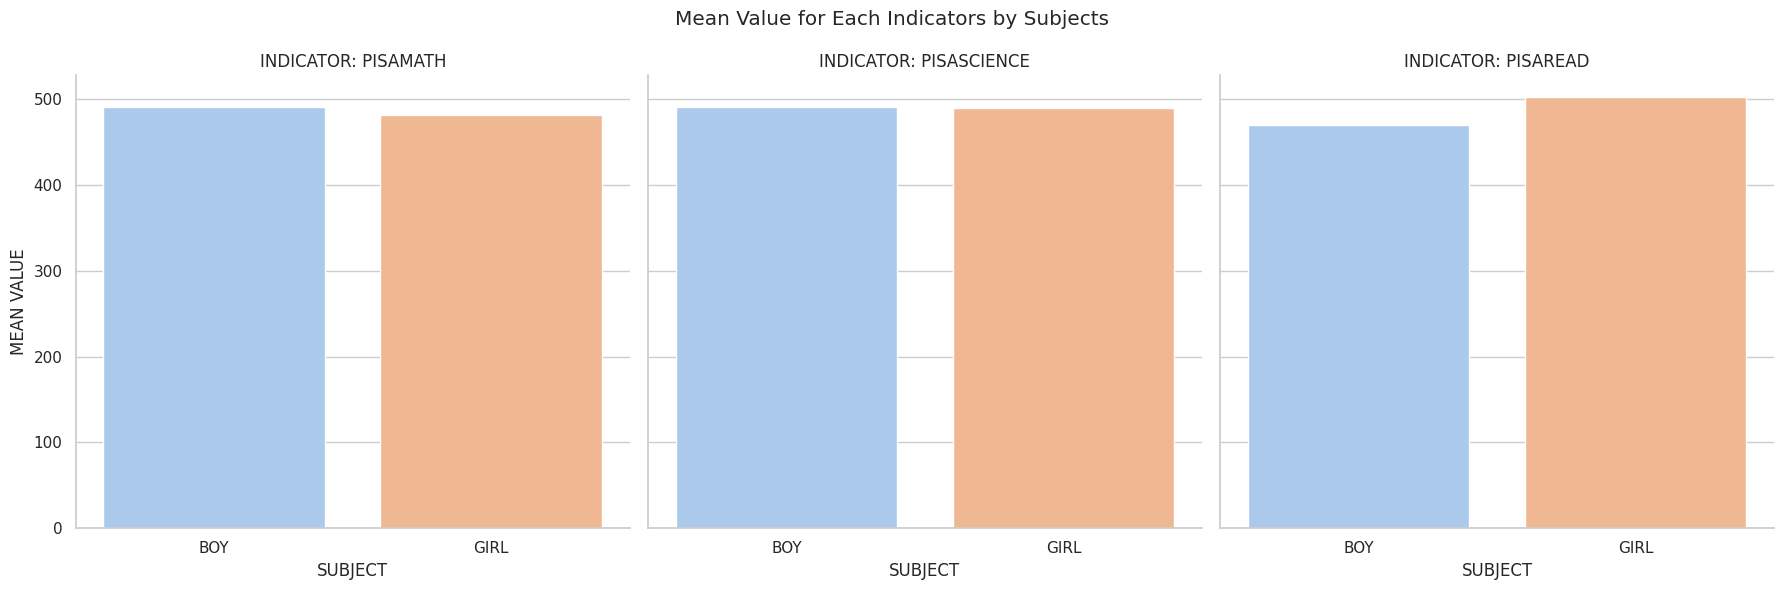

In [15]:
sns.set(style="whitegrid") 
plt.figure(figsize=(12, 6))  

g = sns.FacetGrid(subMeanDf, col="INDICATOR", height=6, col_wrap=3)
g.map(sns.barplot, "SUBJECT", "MEAN VALUE", order=["BOY", "GIRL"], palette="pastel")

plt.suptitle("Mean Value for Each Indicators by Subjects")

g.set_axis_labels("SUBJECT", "MEAN VALUE")
g.set_titles("INDICATOR: {col_name}")


g.tight_layout()


plt.show()

## part 3 : Change in Mean Over Time Series 

In [16]:
pisaMathTime = df[df["INDICATOR"] == "PISAMATH"][["LOCATION","TIME","Value",]]
pisaReadTime = df[df["INDICATOR"] == "PISAREAD"][["LOCATION","TIME","Value"]]
pisaSciTime = df[df["INDICATOR"] == "PISASCIENCE"][["LOCATION","TIME", "Value"]]

## 3.1 Value Change Over Time in PISAMATH

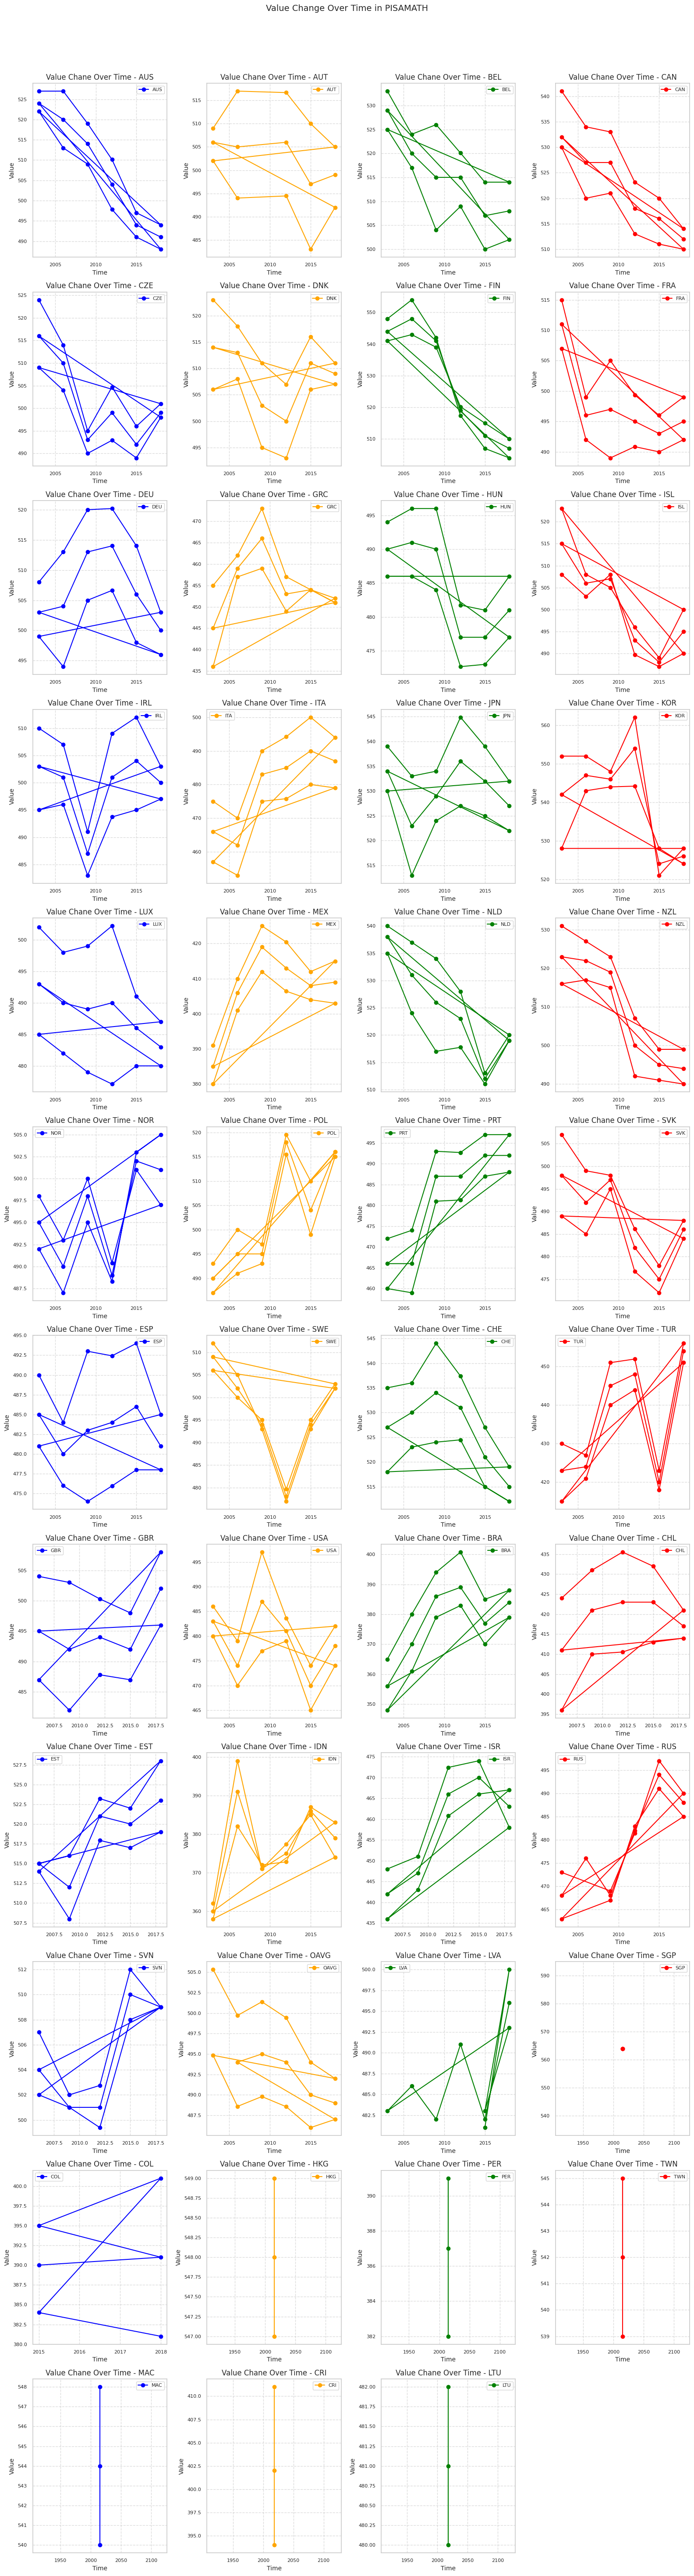

In [17]:

uniqueCountries = pisaMathTime['LOCATION'].unique()


colors = ['blue', 'orange', 'green', 'red']

groups = [uniqueCountries[i:i+4] for i in range(0, len(uniqueCountries), 4)]


plt.figure(figsize=(16, 5 * len(groups)))
for j, group in enumerate(groups):
    for i, country in enumerate(group):
        plt.subplot(len(groups), 4, j * 4 + i + 1)
        country_data = pisaMathTime[pisaMathTime['LOCATION'] == country]
        plt.plot(country_data['TIME'], country_data['Value'], label=country, marker='o', linestyle='-', color=colors[i])
        plt.title(f'Value Chane Over Time - {country}', fontsize=12)
        plt.xlabel('Time', fontsize=10)
        plt.ylabel('Value', fontsize=10)
        plt.xticks(fontsize=8)
        plt.yticks(fontsize=8)
        plt.legend(fontsize=8)
        plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle('Value Change Over Time in PISAMATH', fontsize=14)

plt.show()


## 3.2 Value Change Over Time in PISAREAD

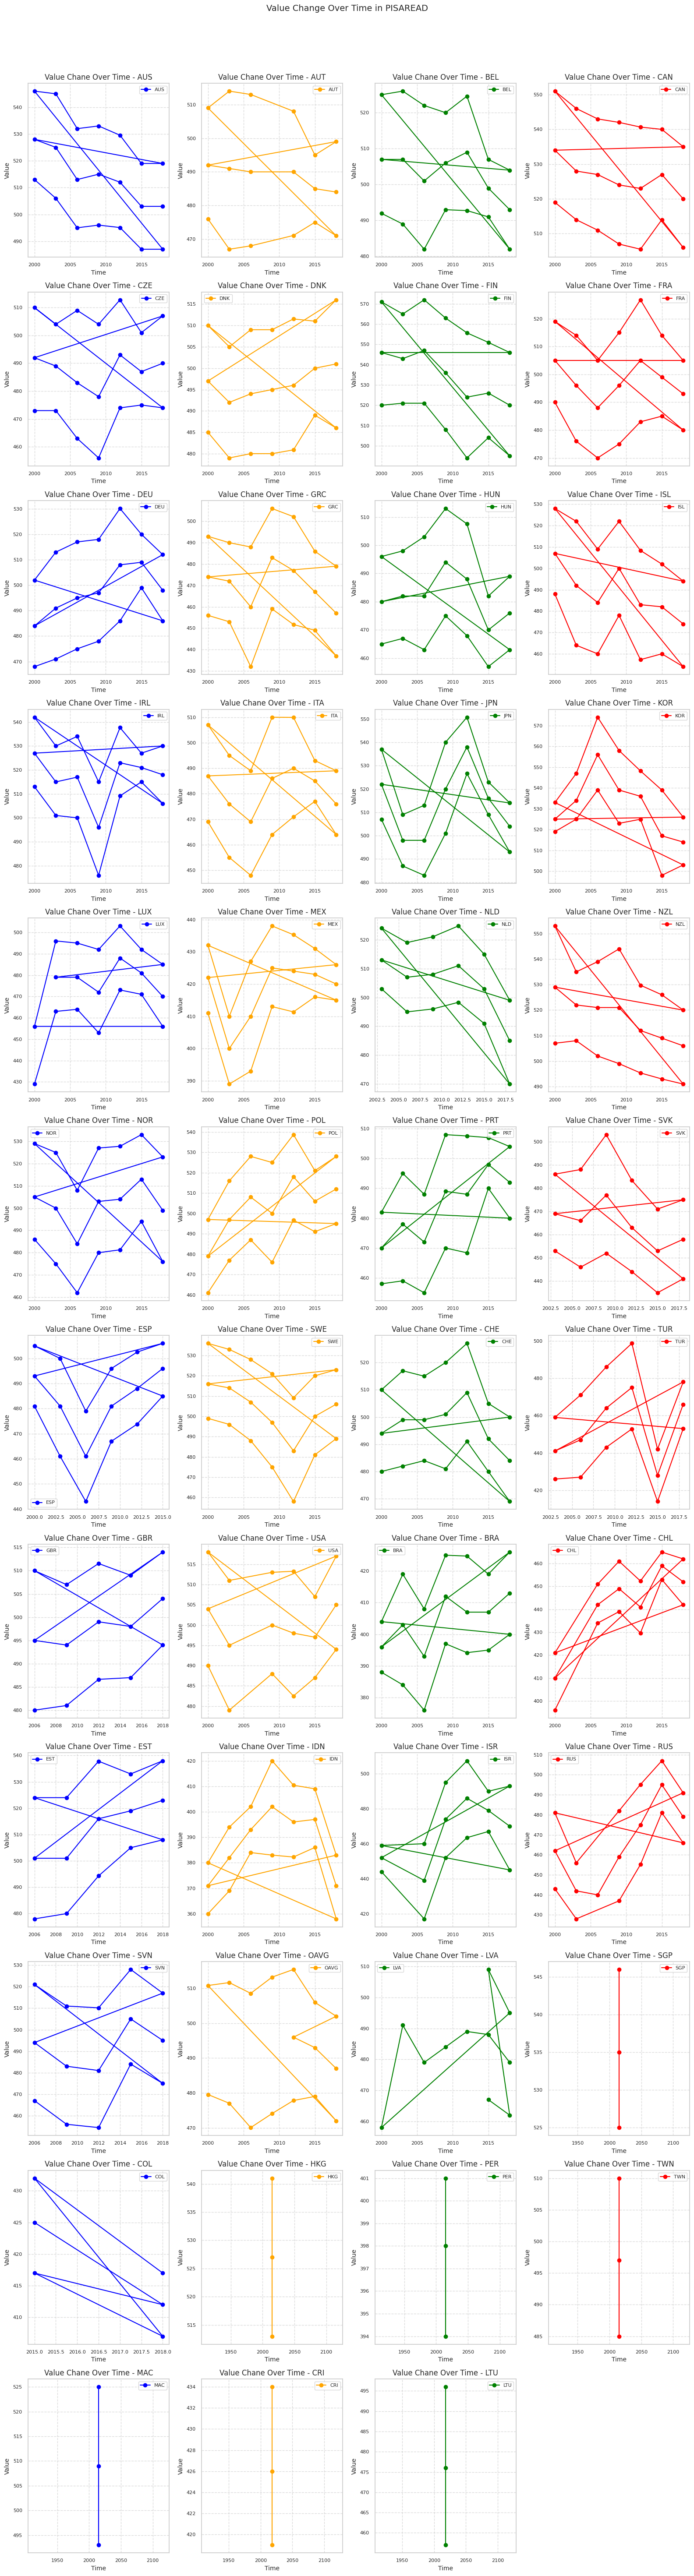

In [18]:

uniqueCountries = pisaReadTime['LOCATION'].unique()


colors = ['blue', 'orange', 'green', 'red']

groups = [uniqueCountries[i:i+4] for i in range(0, len(uniqueCountries), 4)]


plt.figure(figsize=(16, 5 * len(groups)))
for j, group in enumerate(groups):
    for i, country in enumerate(group):
        plt.subplot(len(groups), 4, j * 4 + i + 1)
        country_data = pisaReadTime[pisaReadTime['LOCATION'] == country]
        plt.plot(country_data['TIME'], country_data['Value'], label=country, marker='o', linestyle='-', color=colors[i])
        plt.title(f'Value Chane Over Time - {country}', fontsize=12)
        plt.xlabel('Time', fontsize=10)
        plt.ylabel('Value', fontsize=10)
        plt.xticks(fontsize=8)
        plt.yticks(fontsize=8)
        plt.legend(fontsize=8)
        plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle('Value Change Over Time in PISAREAD', fontsize=14)

plt.show()


## 3.3 Value Chane Over Time in PISASCIENCE

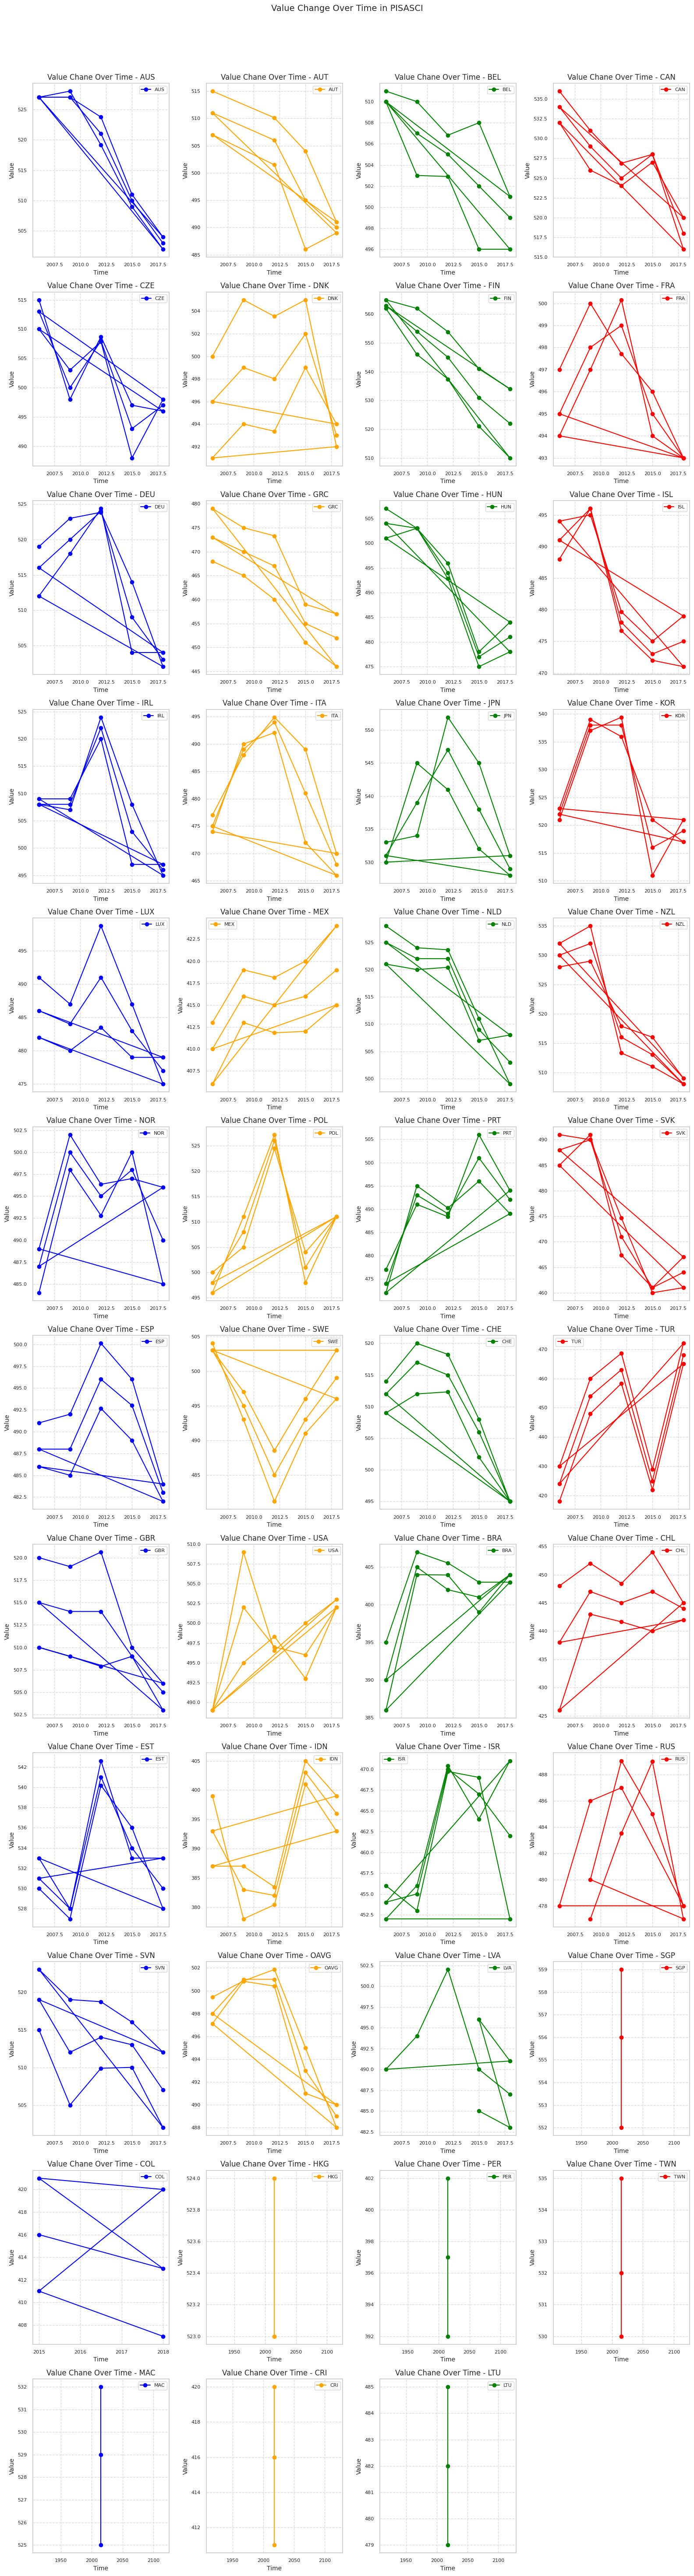

In [19]:

uniqueCountries = pisaSciTime['LOCATION'].unique()


colors = ['blue', 'orange', 'green', 'red']

groups = [uniqueCountries[i:i+4] for i in range(0, len(uniqueCountries), 4)]


plt.figure(figsize=(16, 5 * len(groups)))
for j, group in enumerate(groups):
    for i, country in enumerate(group):
        plt.subplot(len(groups), 4, j * 4 + i + 1)
        country_data = pisaSciTime[pisaSciTime['LOCATION'] == country]
        plt.plot(country_data['TIME'], country_data['Value'], label=country, marker='o', linestyle='-', color=colors[i])
        plt.title(f'Value Chane Over Time - {country}', fontsize=12)
        plt.xlabel('Time', fontsize=10)
        plt.ylabel('Value', fontsize=10)
        plt.xticks(fontsize=8)
        plt.yticks(fontsize=8)
        plt.legend(fontsize=8)
        plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle('Value Change Over Time in PISASCI', fontsize=14)

plt.show()
